In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

## Reading and processing data

In [4]:
filepath = 'digital_marketing_campaign_dataset.csv'
marketing_data = pd.read_csv(filepath, sep=',')

marketing_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
marketing_data.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [5]:
marketing_data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Conversion rate = clicks / actions

In [6]:
marketing_data.isna()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(marketing_data.where(marketing_data.isna() == True).dropna())

Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, Conversion]
Index: []


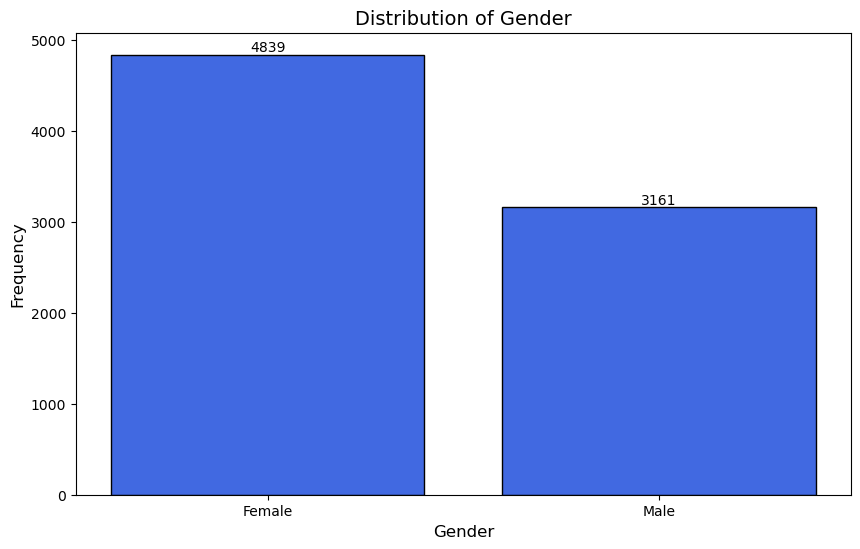

In [8]:
gender_counts = marketing_data['Gender'].value_counts()

# Plotting the bar plot for categorical data
plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(gender_counts)):
    plt.text(i, gender_counts.iloc[i], str(gender_counts.iloc[i]), ha='center', va='bottom', fontsize=10)

# Display gridlines for better readability
#plt.grid(True)

# Show the plot
plt.show()

The histogram indicates that the proportion of female customers is slightly higher than that of male customers. However, the difference is not significant.

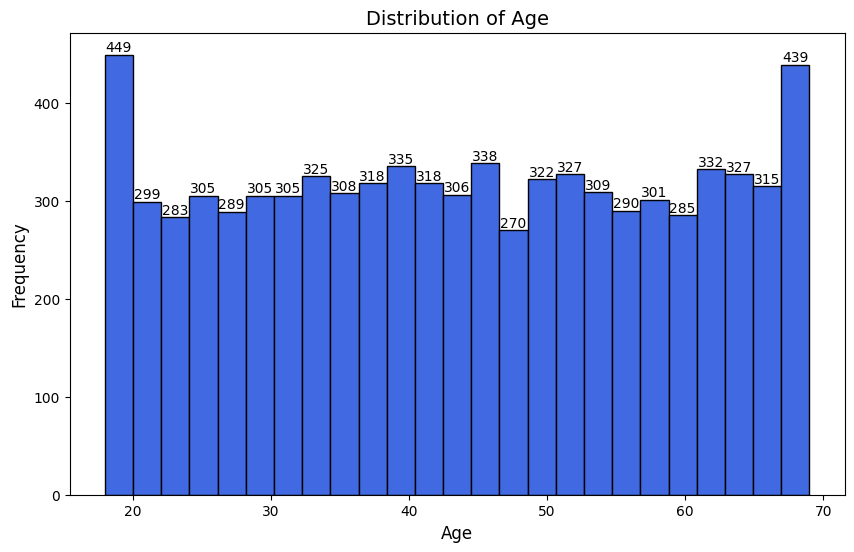

In [9]:
kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
marketing_data['Age_binned'] = kbins.fit_transform(marketing_data[['Age']])

# Now plot the histogram using matplotlib
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(marketing_data['Age'], bins=25, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

The Age distribution histogram shows, a relatively balanced dataset. The 2 edge values (18-20 & 67-69 age group) are outlier values.

In [10]:
min_age = marketing_data['Age'].min()
max_age = marketing_data['Age'].max()

print(min_age)
print(max_age)

18
69


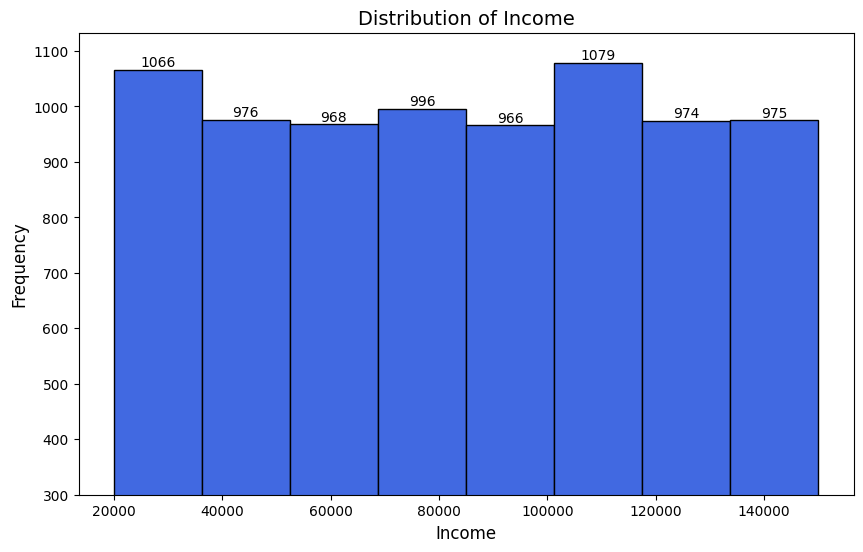

In [11]:
# Plotting the histogram for 'Income' with 8 bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(marketing_data['Income'], bins=8, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Set the lower limit of the y-axis
plt.ylim(bottom=300)

# Show the plot
plt.show()

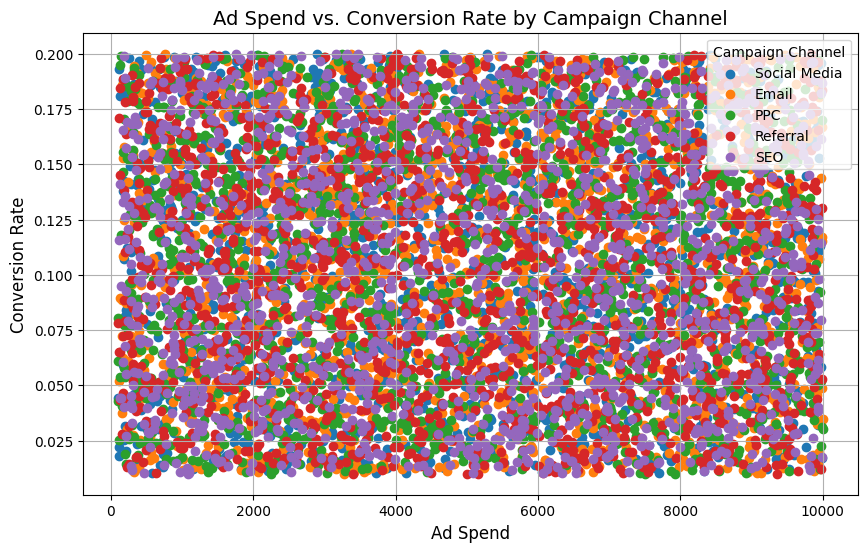

In [12]:
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Loop over each CampaignChannel to plot its points with a unique color
channels = marketing_data['CampaignChannel'].unique()
for channel in channels:
    subset = marketing_data[marketing_data['CampaignChannel'] == channel]
    plt.scatter(subset['AdSpend'], subset['ConversionRate'], label=channel)

# Add title and labels
plt.title('Ad Spend vs. Conversion Rate by Campaign Channel', fontsize=14)
plt.xlabel('Ad Spend', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Show legend and gridlines
plt.legend(title='Campaign Channel')
plt.grid(True)

# Display the plot
plt.show()

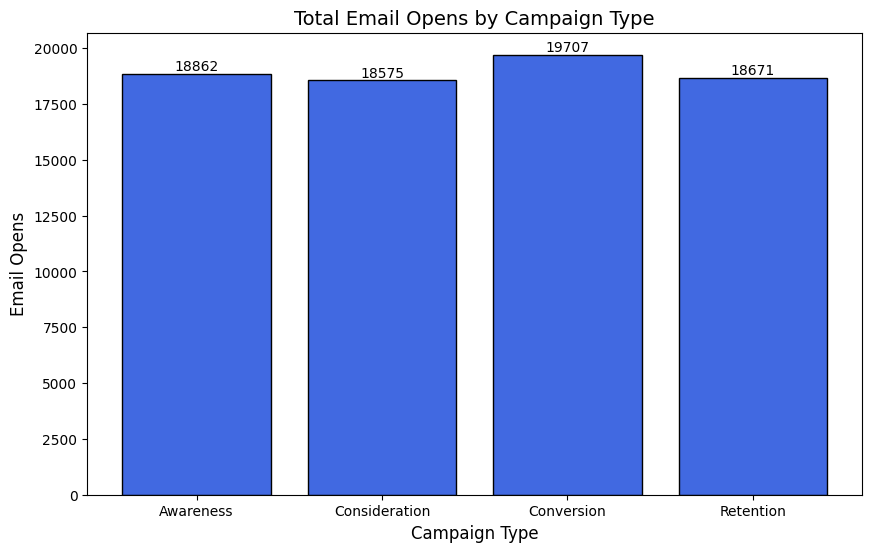

In [13]:
# Group the data by CampaignType and sum EmailOpens
campaign_email_opens = marketing_data.groupby('CampaignType', as_index=False)['EmailOpens'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(campaign_email_opens['CampaignType'], campaign_email_opens['EmailOpens'],
               color='royalblue', edgecolor='black')

plt.title('Total Email Opens by Campaign Type', fontsize=14)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Email Opens', fontsize=12)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.show()

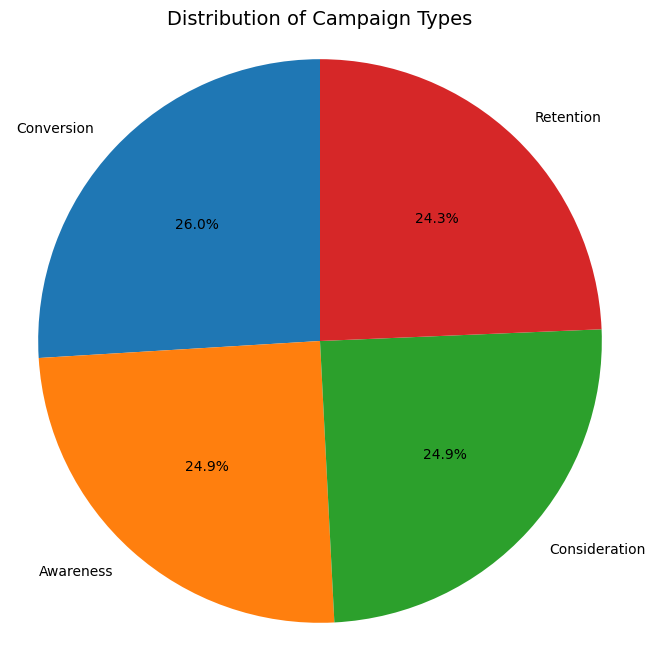

In [14]:
# Count occurrences of each CampaignType
campaign_type_counts = marketing_data['CampaignType'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(campaign_type_counts.values, labels=campaign_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Campaign Types', fontsize=14)
plt.axis('equal')  # Ensures the pie is drawn as a circle.
plt.show()

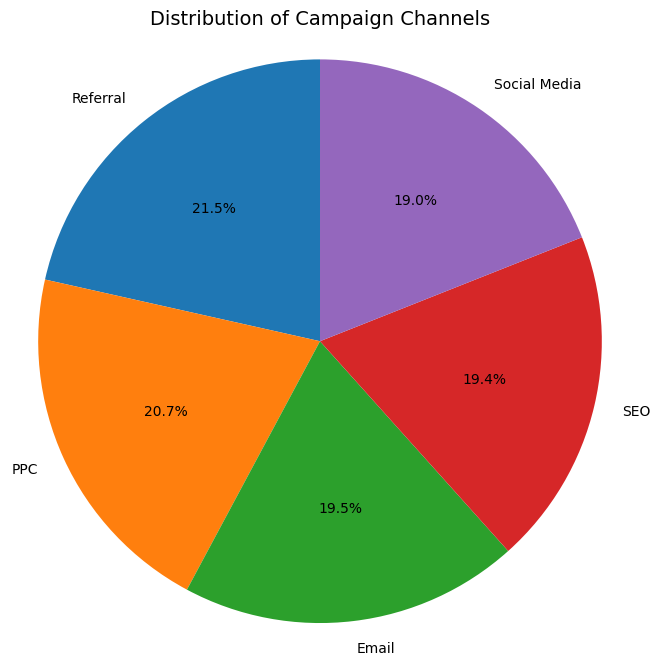

In [15]:
# Count occurrences of each CampaignChannel
campaign_channel_counts = marketing_data['CampaignChannel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(campaign_channel_counts.values, labels=campaign_channel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Campaign Channels', fontsize=14)
plt.axis('equal')
plt.show()

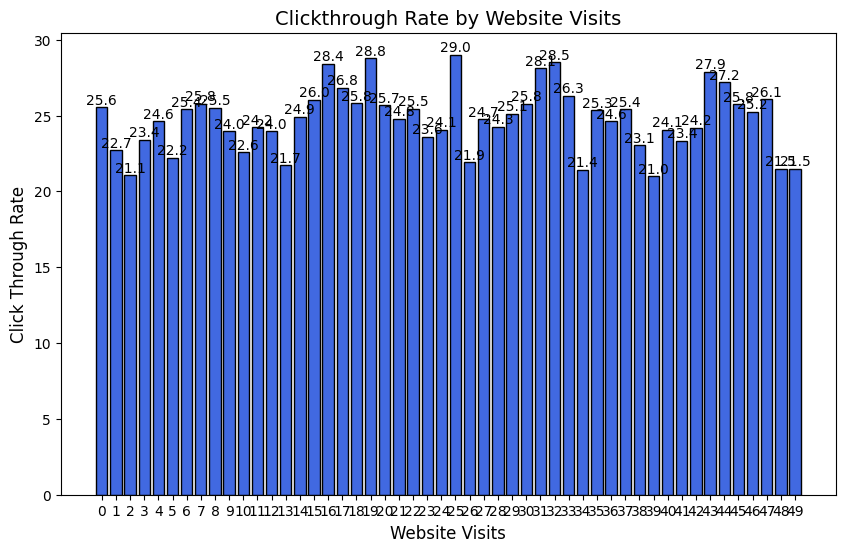

In [16]:
# Group the data by WebsiteVisits and sum ClickThroughRate
website_clickthrough = marketing_data.groupby('WebsiteVisits', as_index=False)['ClickThroughRate'].sum()

plt.figure(figsize=(10, 6))
# Convert WebsiteVisits to string for labeling if needed
bars = plt.bar(website_clickthrough['WebsiteVisits'].astype(str), website_clickthrough['ClickThroughRate'],
               color='royalblue', edgecolor='black')

plt.title('Clickthrough Rate by Website Visits', fontsize=14)
plt.xlabel('Website Visits', fontsize=12)
plt.ylabel('Click Through Rate', fontsize=12)

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

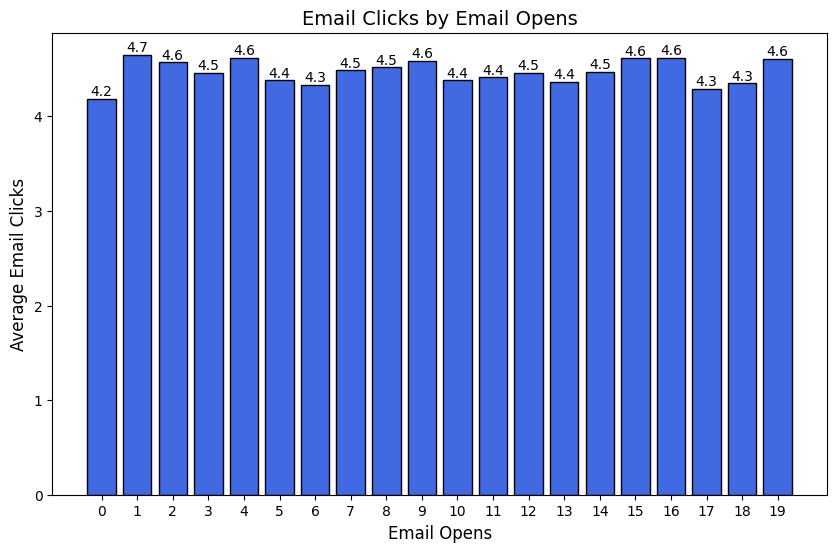

In [17]:
# Group the data by EmailOpens and calculate the mean of EmailClicks
email_clicks_mean = marketing_data.groupby('EmailOpens', as_index=False)['EmailClicks'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(email_clicks_mean['EmailOpens'].astype(str), email_clicks_mean['EmailClicks'],
               color='royalblue', edgecolor='black')

plt.title('Email Clicks by Email Opens', fontsize=14)
plt.xlabel('Email Opens', fontsize=12)
plt.ylabel('Average Email Clicks', fontsize=12)

# Annotate each bar with its mean value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

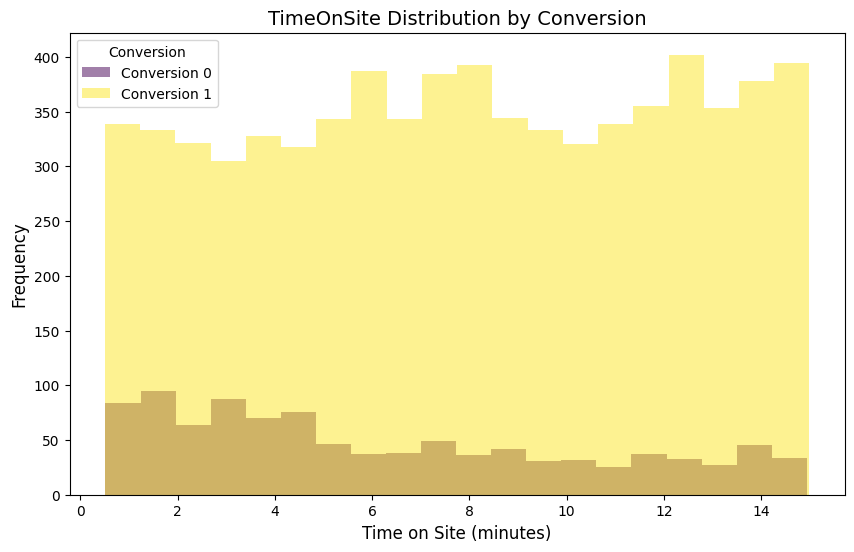

In [18]:
plt.figure(figsize=(10, 6))
conversion_groups = sorted(marketing_data['Conversion'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(conversion_groups)))

for i, conv in enumerate(conversion_groups):
    subset = marketing_data[marketing_data['Conversion'] == conv]
    plt.hist(subset['TimeOnSite'], bins=20, alpha=0.5,
             label=f'Conversion {conv}', color=colors[i])

plt.title('TimeOnSite Distribution by Conversion', fontsize=14)
plt.xlabel('Time on Site (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Conversion')
plt.show()

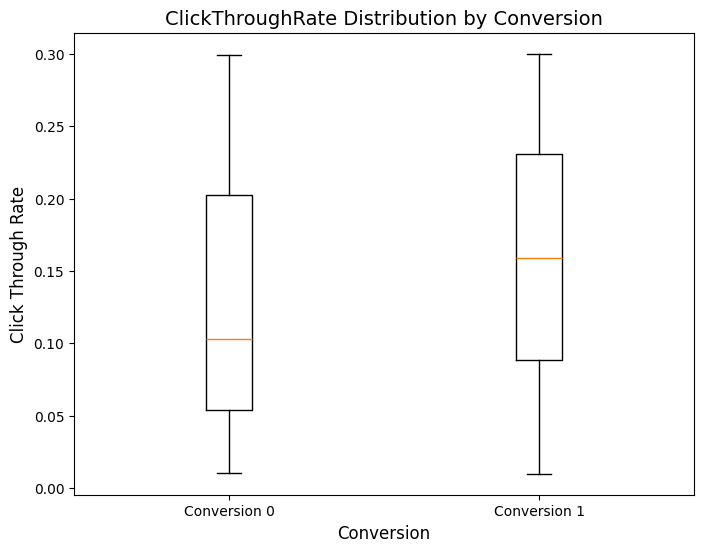

In [20]:
plt.figure(figsize=(8, 6))
conversion_groups = sorted(marketing_data['Conversion'].unique())
data_to_plot = [marketing_data[marketing_data['Conversion'] == conv]['ClickThroughRate']
                for conv in conversion_groups]

plt.boxplot(data_to_plot, tick_labels=[f'Conversion {conv}' for conv in conversion_groups])
plt.title('ClickThroughRate Distribution by Conversion', fontsize=14)
plt.xlabel('Conversion', fontsize=12)
plt.ylabel('Click Through Rate', fontsize=12)
plt.show()

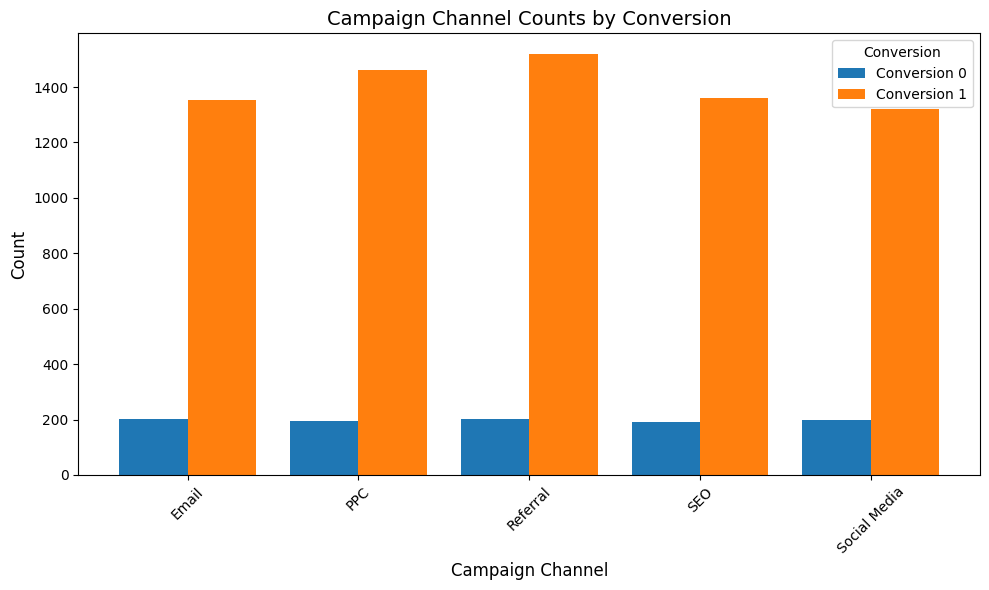

In [21]:
# Group data by CampaignChannel and Conversion
campaign_channel_counts = marketing_data.groupby(['CampaignChannel', 'Conversion']).size().reset_index(name='Count')
# Pivot the data for easier plotting
pivot_channel = campaign_channel_counts.pivot(index='CampaignChannel', columns='Conversion', values='Count').fillna(0)

channels = sorted(pivot_channel.index)
conversions = sorted(marketing_data['Conversion'].unique())

x = np.arange(len(channels))
width = 0.8 / len(conversions)

plt.figure(figsize=(10, 6))
for i, conv in enumerate(conversions):
    counts = pivot_channel[conv].values if conv in pivot_channel.columns else np.zeros(len(channels))
    plt.bar(x + i * width, counts, width=width, label=f'Conversion {conv}')

plt.xticks(x + width * (len(conversions) - 1) / 2, channels, rotation=45)
plt.xlabel('Campaign Channel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Campaign Channel Counts by Conversion', fontsize=14)
plt.legend(title='Conversion')
plt.tight_layout()
plt.show()

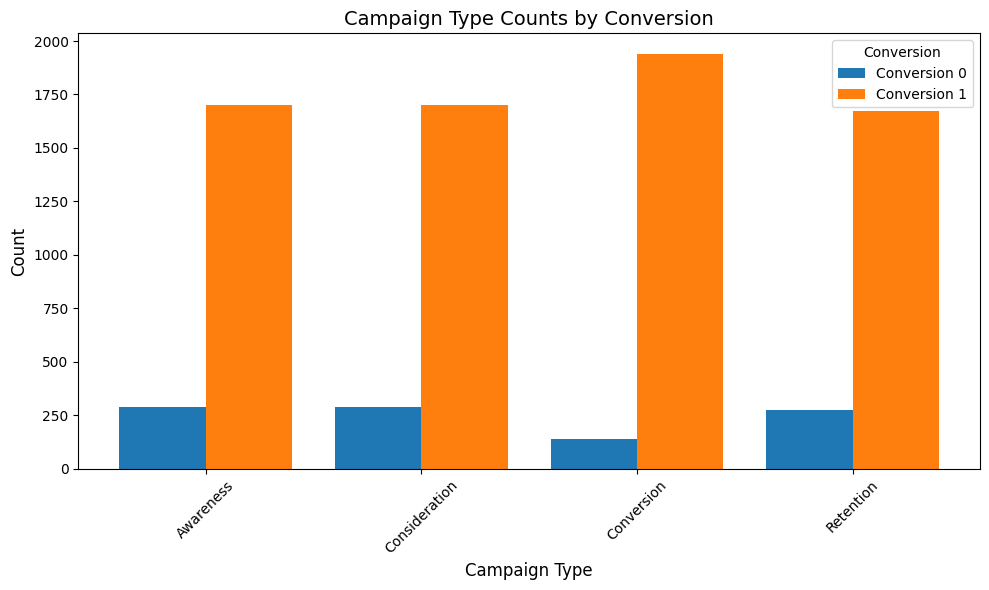

In [22]:
# Group data by CampaignType and Conversion
campaign_type_counts = marketing_data.groupby(['CampaignType', 'Conversion']).size().reset_index(name='Count')
# Pivot the data
pivot_type = campaign_type_counts.pivot(index='CampaignType', columns='Conversion', values='Count').fillna(0)

types = sorted(pivot_type.index)
conversions = sorted(marketing_data['Conversion'].unique())

x = np.arange(len(types))
width = 0.8 / len(conversions)

plt.figure(figsize=(10, 6))
for i, conv in enumerate(conversions):
    counts = pivot_type[conv].values if conv in pivot_type.columns else np.zeros(len(types))
    plt.bar(x + i * width, counts, width=width, label=f'Conversion {conv}')

plt.xticks(x + width * (len(conversions) - 1) / 2, types, rotation=45)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Campaign Type Counts by Conversion', fontsize=14)
plt.legend(title='Conversion')
plt.tight_layout()
plt.show()

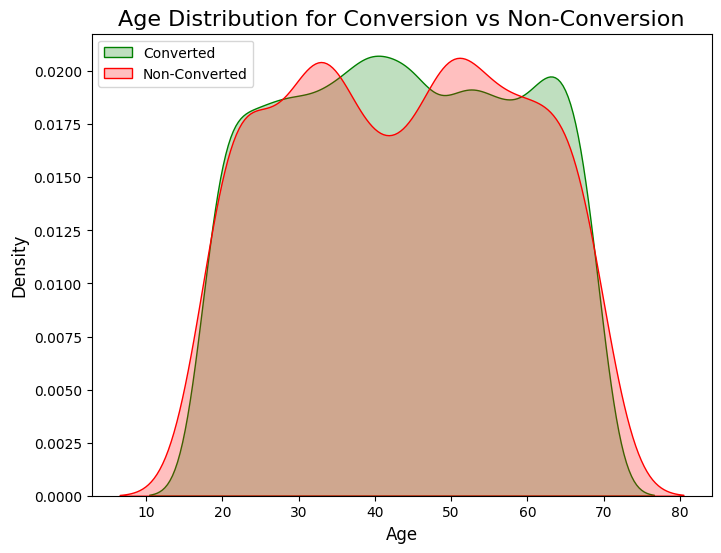

In [5]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=marketing_data[marketing_data['Conversion'] == 1]['Age'], label='Converted', fill=True, color='green')
sns.kdeplot(data=marketing_data[marketing_data['Conversion'] == 0]['Age'], label='Non-Converted', fill=True, color='red')

# Add labels and title
plt.title('Age Distribution for Conversion vs Non-Conversion', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.legend()
plt.show()

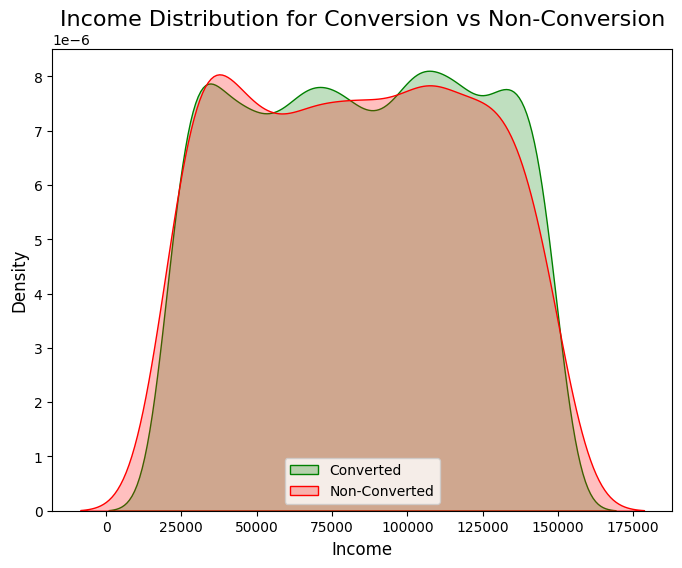

In [6]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=marketing_data[marketing_data['Conversion'] == 1]['Income'], label='Converted', fill=True, color='green')
sns.kdeplot(data=marketing_data[marketing_data['Conversion'] == 0]['Income'], label='Non-Converted', fill=True, color='red')

# Add labels and title
plt.title('Income Distribution for Conversion vs Non-Conversion', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.legend()
plt.show()

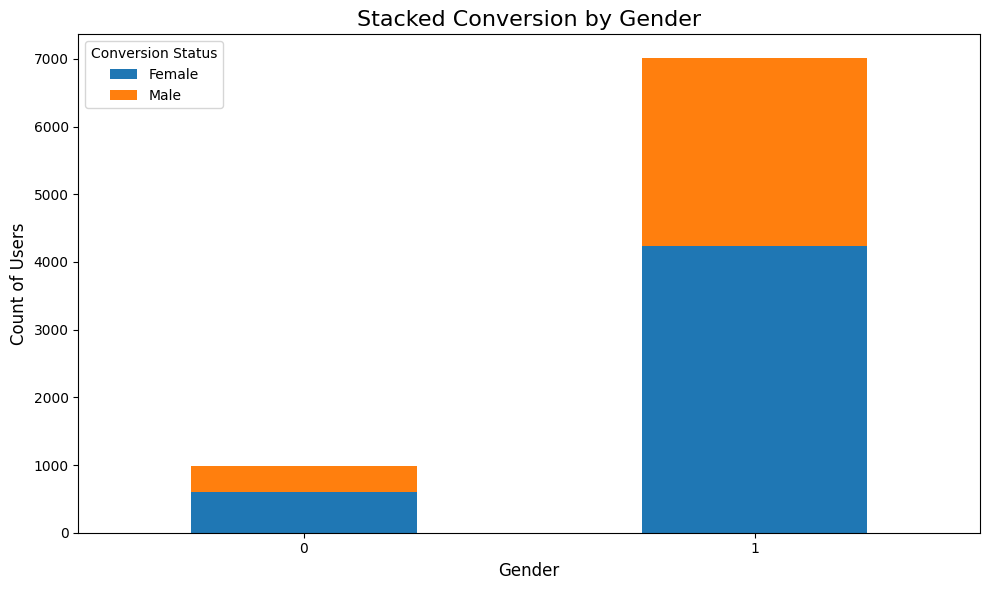

In [7]:
grouped_data = marketing_data.groupby(['Conversion', 'Gender']).size().unstack(fill_value=0)

# Create the stacked bar chart
plt.figure(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=plt.gca()) #ax=plt.gca() to plot on current axes.
plt.title('Stacked Conversion by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Conversion Status')
plt.tight_layout()
plt.show()